<a href="https://colab.research.google.com/github/nberry5/DCS-210/blob/main/Berry_proj5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")

In [ ]:
install.packages("tidymodels")

In [ ]:
install.packages("openintro")

In [ ]:
install.packages("ggformula")

In [39]:
library(ggformula)

In [40]:
library(tidyverse)
library(tidymodels)
library(openintro)

In [58]:
?evals

In [ ]:
glimpse(evals)

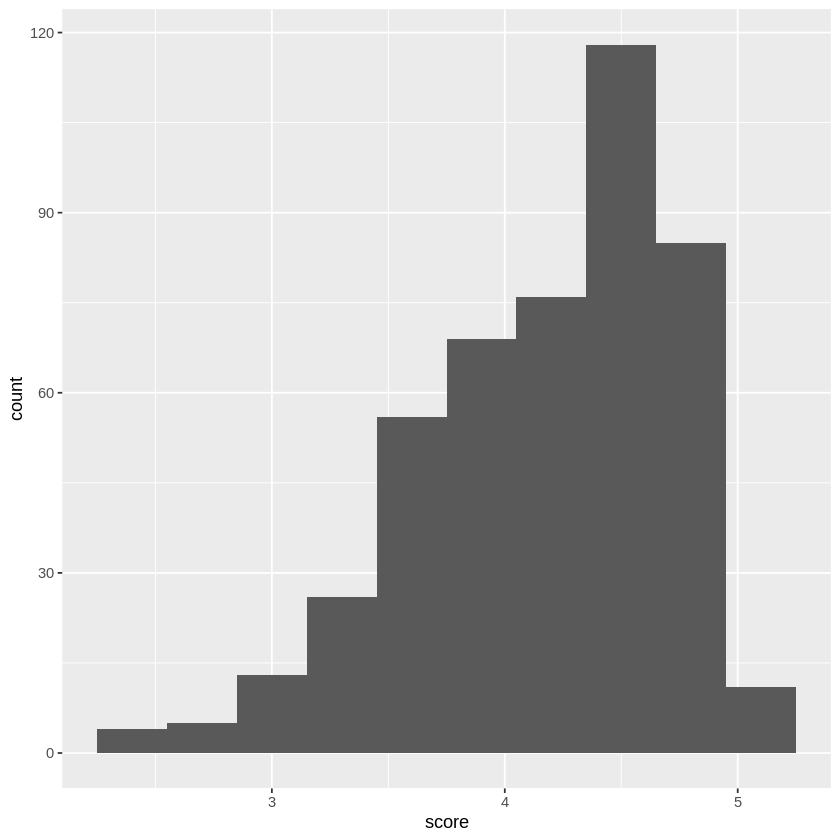

In [65]:
ggplot(evals, aes(score)) +
  geom_histogram(binwidth = 0.3)

1) It is skewed left. Most students usually tend to give high reviews in general. This isn't very surprising to me, as I've found people tend to give relatively positive reviews rather than truly centering arouond the mean of the scale for an average class, product, service, etc.

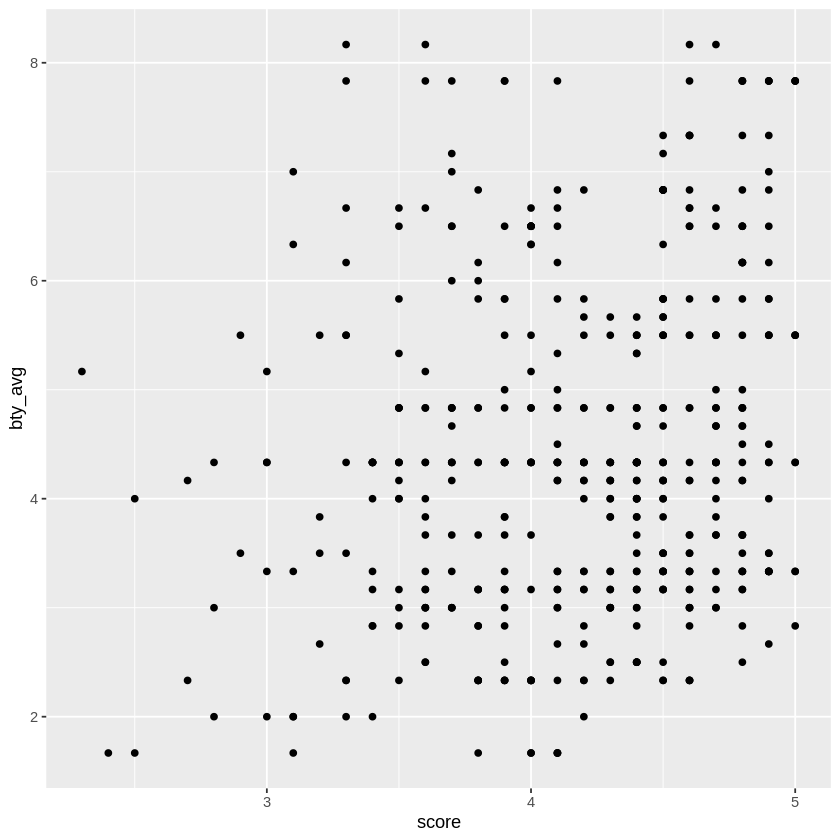

In [44]:
ggplot(evals, aes(score, bty_avg)) +
  geom_point()

2) There appears to be a positive relationship between score and beauty average.

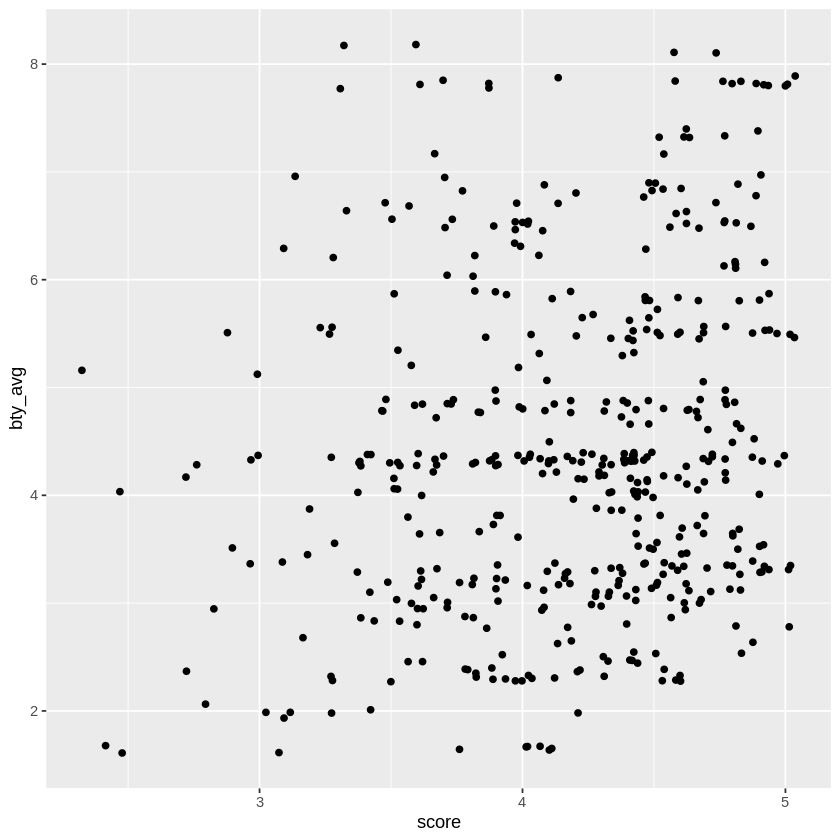

In [45]:
ggplot(evals, aes(score, bty_avg)) +
  geom_jitter()

3) There appear to be an even greater number of points between 4-5 score and 3-6 beauty, confirming the existence of the positive relationship.

In [52]:
score_bty_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ bty_avg, data = evals) %>%
  tidy()

score_bty_fit

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.88033795,0.07614297,50.961212,1.561043e-191
bty_avg,0.06663704,0.01629115,4.090382,5.082731e-05


4) Yhat = 3.8804 + 0.0666x

`geom_smooth()` using formula = 'y ~ x'


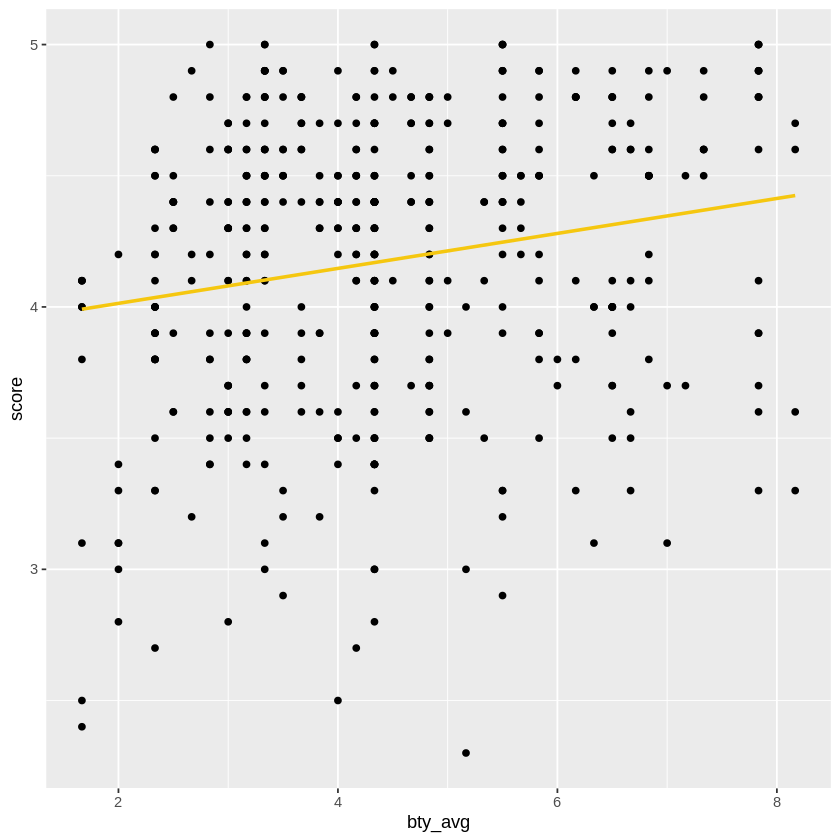

In [53]:
ggplot(evals, aes(bty_avg, score)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = 115599)

6) For each one-unit increase in beauty score, predicted course evaluation score increases by ~0.07.

7) If a beauty score is 0, the predicted course evaluation score is about 3.88. Though it is not actually possible to give a beauty score of 0, it still makes conceptual sense. A professor could still have an average-ranking class if they were ugly.

In [48]:
summary(score_bty_fit)

     term              estimate         std.error         statistic    
 Length:2           Min.   :0.06664   Min.   :0.01629   Min.   : 4.09  
 Class :character   1st Qu.:1.02006   1st Qu.:0.03125   1st Qu.:15.81  
 Mode  :character   Median :1.97349   Median :0.04622   Median :27.53  
                    Mean   :1.97349   Mean   :0.04622   Mean   :27.53  
                    3rd Qu.:2.92691   3rd Qu.:0.06118   3rd Qu.:39.24  
                    Max.   :3.88034   Max.   :0.07614   Max.   :50.96  
    p.value         
 Min.   :0.000e+00  
 1st Qu.:1.271e-05  
 Median :2.541e-05  
 Mean   :2.541e-05  
 3rd Qu.:3.812e-05  
 Max.   :5.083e-05  

8) The adjusted R2 is .0329, meaning that approximately 3.29% of the variance in course evaluation score is explained by beauty score.

In [56]:
score_gender_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ gender, data = evals) %>%
  tidy()

score_gender_fit

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.0928205,0.03866539,105.852305,0.000000000
gendermale,0.1415078,0.05082127,2.784422,0.005582967


9/10) Yhat = 4.093 + 0.142x

The predicted evaluation score for a female professor (a value of 0 for gendermale) is 4.093, and predicted evaluation score increases by 0.142 if the professor is male (gendermale variable goes from 0 to 1)

In [57]:
score_rank_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ rank, data = evals) %>%
  tidy()

score_rank_fit

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.2843137,0.05365284,79.852504,1.021033e-271
ranktenure track,-0.1296841,0.07481531,-1.733390,8.369651e-02
ranktenured,-0.1451833,0.06355455,-2.284389,2.280338e-02


11) Yhat = 4.2843 - 0.1297x1 - 0.1452x2

(x1 = tenure track, x2 = tenured)

The predicted evaluation score for a professor who is neither tenured nor tenure track is 4.2843. A tenure track professor has a 0.1297 lower predicted evaluation score and a tenured professor has a 0.1452 lower predicted evaluation score.

In [59]:
rank_relevel <- relevel(evals$rank,  ref = "tenure track")

In [61]:
score_rank_relevel_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ rank_relevel, data = evals) %>%
  tidy()

score_rank_relevel_fit
summary(score_rank_relevel_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.15462963,0.05214119,79.6803772,2.577096e-271
rank_relevelteaching,0.12968410,0.07481531,1.7333898,8.369651e-02
rank_releveltenured,-0.01549919,0.06228368,-0.2488484,8.035891e-01


     term              estimate          std.error         statistic      
 Length:3           Min.   :-0.01550   Min.   :0.05214   Min.   :-0.2488  
 Class :character   1st Qu.: 0.05709   1st Qu.:0.05721   1st Qu.: 0.7423  
 Mode  :character   Median : 0.12968   Median :0.06228   Median : 1.7334  
                    Mean   : 1.42294   Mean   :0.06308   Mean   :27.0550  
                    3rd Qu.: 2.14216   3rd Qu.:0.06855   3rd Qu.:40.7069  
                    Max.   : 4.15463   Max.   :0.07482   Max.   :79.6804  
    p.value       
 Min.   :0.00000  
 1st Qu.:0.04185  
 Median :0.08370  
 Mean   :0.29576  
 3rd Qu.:0.44364  
 Max.   :0.80359  

13) Yhat = 4.1546 + 0.1297x1 - 0.0155x2

(x1 = teaching, x2 = tenured)

The predicted evaluation score for a professor who is tenure track is 4.2843. A teaching professor has a 0.1297 higher predicted evaluation score and a tenured professor has a 0.0155 lower predicted evaluation score.

In [63]:
new_evals <- evals %>% 
  mutate(tenure_eligible = case_when(
    rank == "teaching" ~ "no", 
    rank == "tenure track" ~ "yes", 
    rank == "tenured" ~ "yes")
    )

In [64]:
score_tenure_eligible_fit <- linear_reg() %>%
  set_engine("lm") %>%
  fit(score ~ tenure_eligible, data = new_evals) %>%
  tidy()

score_tenure_eligible_fit
summary(score_tenure_eligible_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.2843137,0.05359823,79.933873,2.723351e-272
tenure_eligibleyes,-0.1405464,0.06069981,-2.315434,2.102730e-02


     term              estimate         std.error         statistic     
 Length:2           Min.   :-0.1405   Min.   :0.05360   Min.   :-2.315  
 Class :character   1st Qu.: 0.9657   1st Qu.:0.05537   1st Qu.:18.247  
 Mode  :character   Median : 2.0719   Median :0.05715   Median :38.809  
                    Mean   : 2.0719   Mean   :0.05715   Mean   :38.809  
                    3rd Qu.: 3.1781   3rd Qu.:0.05892   3rd Qu.:59.372  
                    Max.   : 4.2843   Max.   :0.06070   Max.   :79.934  
    p.value        
 Min.   :0.000000  
 1st Qu.:0.005257  
 Median :0.010514  
 Mean   :0.010514  
 3rd Qu.:0.015770  
 Max.   :0.021027  

15) Yhat = 4.2843 - 0.1405x

The predicted evaluation score for a non-tenure track professor is 4.2843. Predicted evaluation score decreases by 0.1405 if the professor is tenure eligible.

The R2 value is 0.0115, which means that tenure-eligibility explains about 1.15% of the varience in evaluation score.